In [2]:
import numpy as np

import os
import gzip
import matplotlib.pyplot as plt
import sys
import time


import argparse
import sys
#import tempfile

FLAGS = None

In [3]:
import tensorflow as tf

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [46]:
def add_noise(image,var=0.01):
    mean = 0
    sigma = var**0.5
    for i in range(image.shape[0]):
        gauss = np.random.normal(mean,sigma)
        image[i]=image[i]+gauss        
    return image

In [4]:
def cnn(x):

  # reshape 
  with tf.name_scope('input_reshaped_layer'):
    x_image = tf.reshape(x, [mini_batch_size, 28, 28, 1])

  # convolutional layer 1
  with tf.name_scope('conv_layer_1'):
    W1 = tf.Variable(tf.truncated_normal([3, 3, 1, 8], stddev=0.1))
    b1 = tf.Variable(tf.constant(0.1, shape=[8]))
    h1 = tf.nn.conv2d(x_image, W1, strides=[1, 1, 1, 1], padding='SAME')
    h1 = tf.nn.relu(h1 + b1)

  # maxpooling layer 1
  with tf.name_scope('maxpool_layer_1'):
    hp1 = tf.nn.max_pool(h1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

  # convolutional layer 2
  with tf.name_scope('conv_layer_2'):
    W2 = tf.Variable(tf.truncated_normal([3, 3, 8, 4], stddev=0.1))
    b2 = tf.Variable(tf.constant(0.1, shape=[4]))
    h2 = tf.nn.conv2d(hp1, W2, strides=[1, 1, 1, 1], padding='SAME')
    h2 = tf.nn.relu(h2 + b2)


  # Mmaxpooling layer 2
  with tf.name_scope('maxpool_layer_2'):
    hp2 = tf.nn.max_pool(h2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

  # convolutional layer 3
  with tf.name_scope('conv_layer_3'):
    W3 = tf.Variable(tf.truncated_normal([3, 3, 4, 2], stddev=0.1))
    b3 = tf.Variable(tf.constant(0.1, shape=[2]))
    h3 = tf.nn.conv2d(hp2, W3, strides=[1, 1, 1, 1], padding='SAME')
    h3 = tf.nn.relu(h3 + b3)
   

  # Transposed convolution wieghts
  #d_conv1 = weight_variable([2, 2, 4, 2])
  # Output shape
  #out_shape1 = [64, 14, 14, 4]
  # Filter size
  #filter_size = [2, 2, 4, 2]
  # Stride size
  #stride  = [1, 2, 2, 1]
  # First deconvolution size :14x14x4
  with tf.name_scope('t_conv_layer_4'):
    W4 = tf.Variable(tf.truncated_normal([2, 2, 4, 2], stddev=0.1))
    th4 = tf.nn.conv2d_transpose(h3,W4,[mini_batch_size, 14, 14, 4],strides=[1, 2, 2, 1], padding='SAME', data_format = 'NHWC')
 
  # convolutional layer 5
  with tf.name_scope('conv_layer_5'):
    W5 = tf.Variable(tf.truncated_normal([3, 3, 4, 4], stddev=0.1))
    b5 = tf.Variable(tf.constant(0.1, shape=[4]))
    h5 = tf.nn.conv2d(th4, W5, strides=[1, 1, 1, 1], padding='SAME')
    h5 = tf.nn.relu(h5 + b5)
    
  with tf.name_scope('t_conv_layer_6'):
    W6 = tf.Variable(tf.truncated_normal([2, 2, 8, 4], stddev=0.1))
    th6 = tf.nn.conv2d_transpose(h5,W6,[mini_batch_size, 28, 28, 8],strides=[1, 2, 2, 1], padding='SAME', data_format = 'NHWC')
   
  # convolutional layer 7
  with tf.name_scope('conv_layer_7'):
    W7 = tf.Variable(tf.truncated_normal([3, 3, 8, 8], stddev=0.1))
    b7 = tf.Variable(tf.constant(0.1, shape=[8]))
    h7 = tf.nn.conv2d(th6, W7, strides=[1, 1, 1, 1], padding='SAME')
    h7 = tf.nn.relu(h7 + b7)

  # output convolutional layer 8
  with tf.name_scope('conv_layer_8'):
    W8 = tf.Variable(tf.truncated_normal([3, 3, 8, 1], stddev=0.1))
    b8 = tf.Variable(tf.constant(0.1, shape=[1]))
    h8 = tf.nn.conv2d(h7, W8, strides=[1, 1, 1, 1], padding='SAME')
    h8 = tf.nn.relu(h8 + b8)

  with tf.name_scope('output_reshaped_layer'):
    x_out = tf.reshape(h8, [mini_batch_size, 784])
    
  return x_out


Saving to: /home/tsapenko/Documents/Lab2/mnist_convnet_model
Batch: 0 Loss value:0.101127
Batch: 10 Loss value:0.092447
Batch: 20 Loss value:0.0784983
Batch: 30 Loss value:0.0483688
Batch: 40 Loss value:0.046333
Batch: 50 Loss value:0.0420242
Batch: 60 Loss value:0.0352262
Batch: 70 Loss value:0.0315464
Batch: 80 Loss value:0.0301956
Batch: 90 Loss value:0.0253813
Batch: 100 Loss value:0.0250439
Batch: 110 Loss value:0.0228449
Batch: 120 Loss value:0.025948
Batch: 130 Loss value:0.0210227
Batch: 140 Loss value:0.0210595
Batch: 150 Loss value:0.0232657
Batch: 160 Loss value:0.0213362
Batch: 170 Loss value:0.0187504
Batch: 180 Loss value:0.0222683
Batch: 190 Loss value:0.021599
Batch: 200 Loss value:0.0206185
Batch: 210 Loss value:0.0202095
Batch: 220 Loss value:0.0191566
Batch: 230 Loss value:0.0184603
Batch: 240 Loss value:0.0208693
Batch: 250 Loss value:0.0182798
Batch: 260 Loss value:0.0225756
Batch: 270 Loss value:0.0216966
Batch: 280 Loss value:0.0181892
Batch: 290 Loss value:0.020

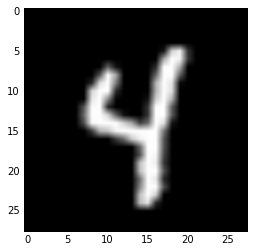

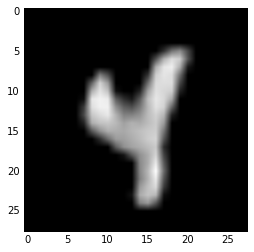

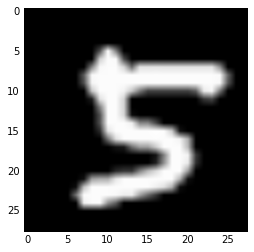

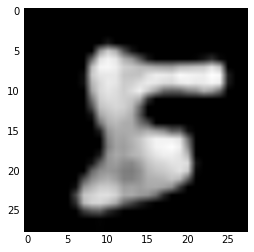

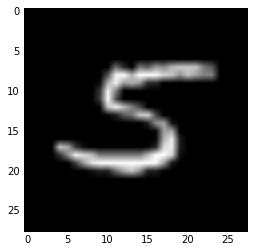

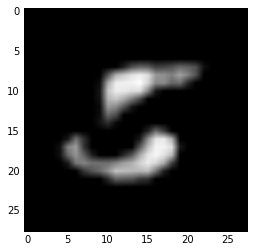

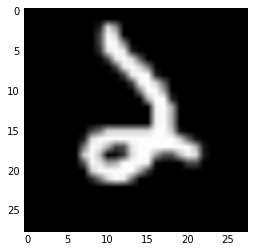

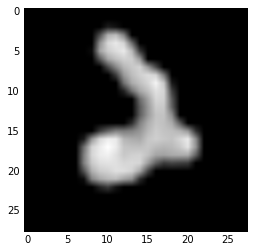

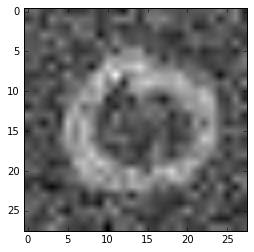

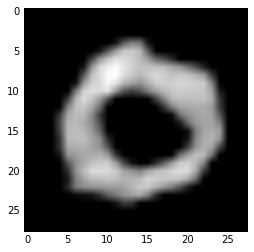

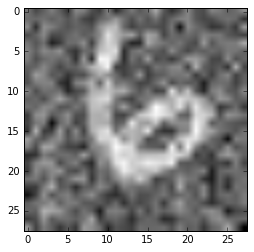

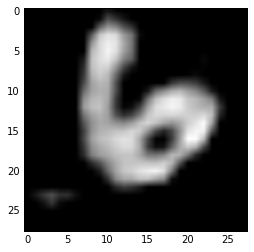

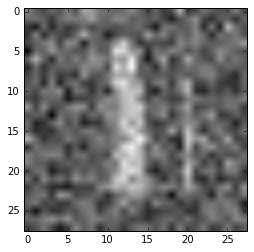

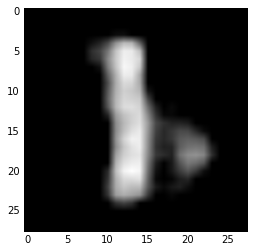

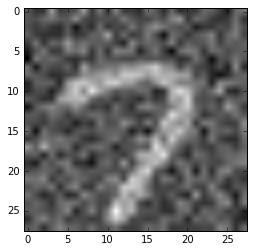

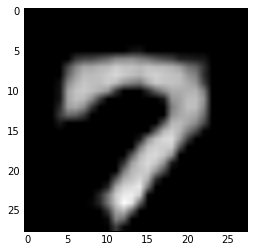

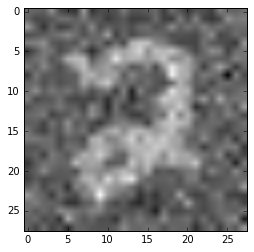

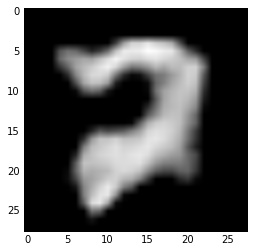

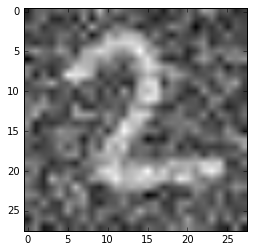

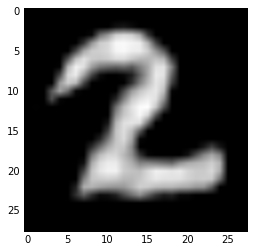

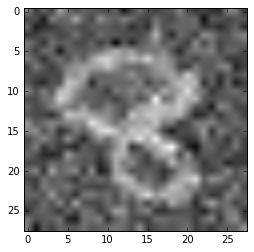

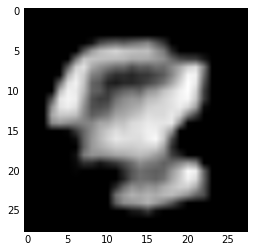

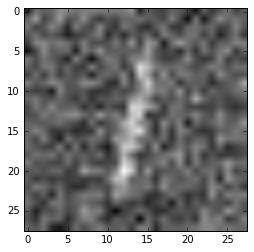

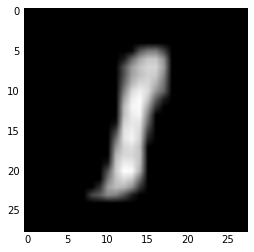

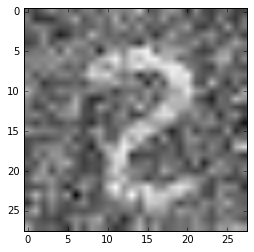

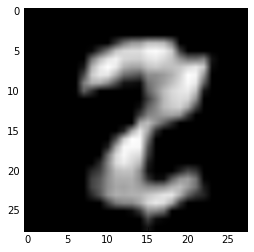

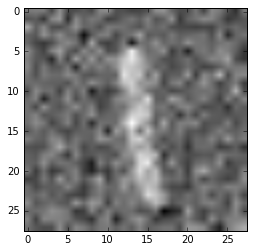

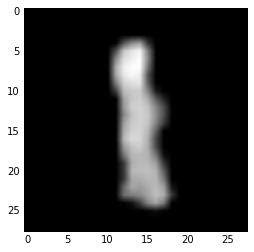

SystemExit: 

/home/tsapenko/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [49]:

loss_tr_array=[]
loss_v__array=[]
mini_batch_size=64
learning_rate=1e-2


def main(_):
  
  #mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


  
  x = tf.placeholder(tf.float32, [None, 784])
  #y_ = tf.placeholder(tf.float32, [None, 10])
  
 
  x_hat = cnn(x)



  #with tf.name_scope('loss_cross_entropy'):
  #  cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_hat)
  #cross_entropy = tf.reduce_mean(cross_entropy)

  with tf.name_scope('loss_square'):
    loss = tf.reduce_mean(tf.square(x_hat - x))


  #GradientDescentOptimizer
  #with tf.name_scope('GradientDescent'):
  #  train_step = tf.train.GradientDescentOptimizer(1e-1).minimize(cross_entropy)
    
  #it's faster
  with tf.name_scope('adam_optimizer'):
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

  #with tf.name_scope('accuracy'):
  #  correct_prediction = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y_, 1))
  #  correct_prediction = tf.cast(correct_prediction, tf.float32)
  #accuracy = tf.reduce_mean(correct_prediction)


  graph_location = "/home/tsapenko/Documents/Lab2/mnist_convnet_model"
  print('Saving to: %s' % graph_location)
  train_writer = tf.summary.FileWriter(graph_location)
  train_writer.add_graph(tf.get_default_graph())
   



  config = tf.ConfigProto(
    device_count = {'GPU': 0})
  sess = tf.Session(config=config)
  

  with sess as sess:
    sess.run(tf.global_variables_initializer())
    t0 = time.time()
    for i in range(500):
      batch = mnist.train.next_batch(mini_batch_size)
      train_step.run(feed_dict={x: batch[0]})
      loss_tr = loss.eval(feed_dict = {x: batch[0]})
      loss_tr_array.append(loss_tr)
      if i % 10 == 0:
            print("Batch: " + str(i) + " Loss value:" + str(loss_tr))

    t1 = time.time()    
    print('Duration: {:.1f}s'.format(t1-t0))
    
    
    #draw images
    batch = mnist.test.next_batch(mini_batch_size)
    output= x_hat.eval(feed_dict={x: batch[0]})
    for i in range (4):
        
        input_img=batch[0][i]
        pixels_in = input_img.reshape((28, 28))
        plt.imshow(pixels_in, cmap='gray')
        plt.show()
        
        output_img=output[i]
        pixels_out = output_img.reshape((28, 28))
        plt.imshow(pixels_out, cmap='gray')
        plt.show()
     
    
    #noisy images
    batch = mnist.test.next_batch(mini_batch_size)
    for i in range (10):
        batch[0][i]=add_noise(batch[0][i],var=0.1)
        
    output= x_hat.eval(feed_dict={x: batch[0]})
    for i in range (10):
        
        input_img=batch[0][i]
        pixels_in = input_img.reshape((28, 28))
        plt.imshow(pixels_in, cmap='gray')
        plt.show()
        
        output_img=output[i]
        pixels_out = output_img.reshape((28, 28))
        plt.imshow(pixels_out, cmap='gray')
        plt.show()    

    
    
if __name__ == '__main__':
  parser = argparse.ArgumentParser()
  parser.add_argument('--data_dir', type=str,
                      default='/tmp/tensorflow/mnist/input_data',
                      help='Directory for storing input data')
  FLAGS, unparsed = parser.parse_known_args()
  tf.app.run(main=main, argv=[sys.argv[0]] + unparsed)

In [24]:
loss_tr_array2=np.copy(loss_tr_array)

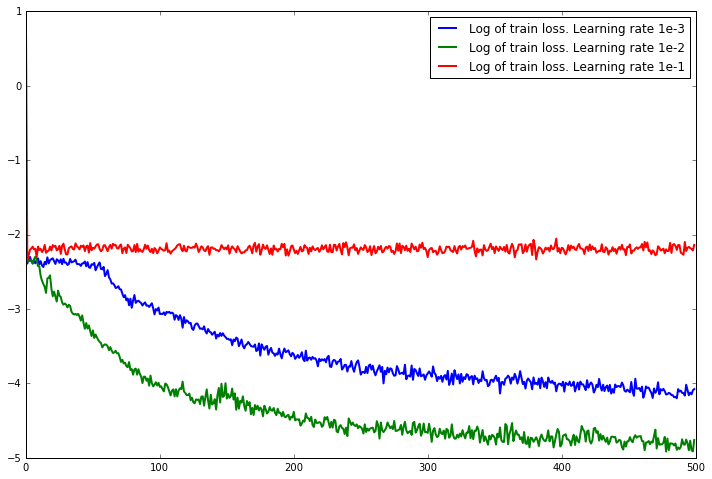

In [27]:
#print(valid_acc_arr)


plt.figure(figsize=(12, 8))


plt.plot(np.log(loss_tr_array3), label='Log of train loss. Learning rate 1e-3', linewidth=2.0)
plt.plot(np.log(loss_tr_array2), label='Log of train loss. Learning rate 1e-2', linewidth=2.0)
plt.plot(np.log(loss_tr_array1), label='Log of train loss. Learning rate 1e-1', linewidth=2.0)
plt.legend(loc='best')    
plt.show()    